<a href="https://colab.research.google.com/github/youngchul-sung/deep-learning-with-python/blob/master/5_4_visualizing_what_convnets_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

from tensorflow import keras
keras.__version__

TensorFlow 2.x selected.


'2.2.4-tf'

In [2]:
import os

if not os.path.exists('deep-learning-with-python-notebooks'):
    !git clone https://github.com/rickiepark/deep-learning-with-python-notebooks.git

import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = 'deep-learning-with-python-notebooks/datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.makedirs(base_dir, exist_ok=True)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

    # 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Cloning into 'deep-learning-with-python-notebooks'...
remote: Enumerating objects: 123888, done.
remote: Total 123888 (delta 0), reused 0 (delta 0), pack-reused 123888
Receiving objects: 100% (123888/123888), 685.24 MiB | 6.67 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Checking out files: 100% (104042/104042), done.


In [3]:
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# a known issue -> https://github.com/tensorflow/tensorflow/issues/25254
# temporarily, specify argument values as below
steps_per_epoch = 2000 // 32
validation_steps = 1000 // 32

history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_steps)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 31 steps
Epoch 1/100
62/62 [==============================] - 24s 383ms/step - loss: 0.6947 - acc: 0.5132 - val_loss: 0.6898 - val_acc: 0.5000
Epoch 2/100
62/62 [==============================] - 18s 286ms/step - loss: 0.6874 - acc: 0.5320 - val_loss: 0.6767 - val_acc: 0.5968
Epoch 3/100
62/62 [==============================] - 17s 280ms/step - loss: 0.6807 - acc: 0.5610 - val_loss: 0.6596 - val_acc: 0.5847
Epoch 4/100
62/62 [==============================] - 17s 278ms/step - loss: 0.6731 - acc: 0.5666 - val_loss: 0.6573 - val_acc: 0.5938
Epoch 5/100
62/62 [==============================] - 17s 280ms/step - loss: 0.6618 - acc: 0.5991 - val_loss: 0.6504 - val_acc: 0.5988
Epoch 6/100
62/62 [==============================] - 18s 284ms/step - loss: 0.6536 - acc: 0.6108 - val_loss: 0.6430 - val_acc: 0.6179
Epoch 7/100
62/62 [=

In [4]:
from tensorflow.keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()  # 기억을 되살리기 위해서 모델 구조를 출력합니다

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
img_path = './datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'

# 이미지를 4D 텐서로 변경합니다
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# 모델이 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용합니다
img_tensor /= 255.

# 이미지 텐서의 크기는 (1, 150, 150, 3)입니다
print(img_tensor.shape)

(1, 150, 150, 3)


In [0]:
import matplotlib.pyplot as plt

In [7]:
plt.imshow(img_tensor[0])
plt.show()

In [0]:
from tensorflow.keras import models

# 상위 8개 층의 출력을 추출합니다:
layer_outputs = [layer.output for layer in model.layers[:8]]
# 입력에 대해 8개 층의 출력을 반환하는 모델을 만듭니다:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
# 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트를 반환합니다:
activations = activation_model.predict(img_tensor)

In [10]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [11]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

In [12]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


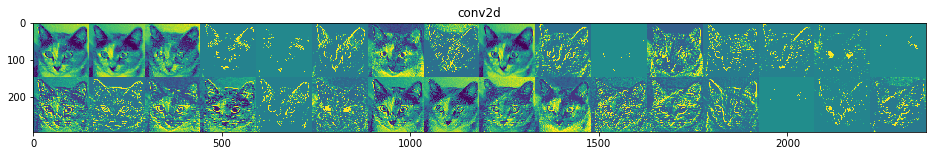

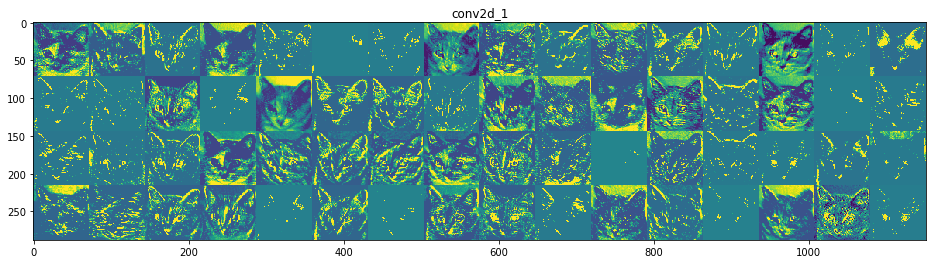

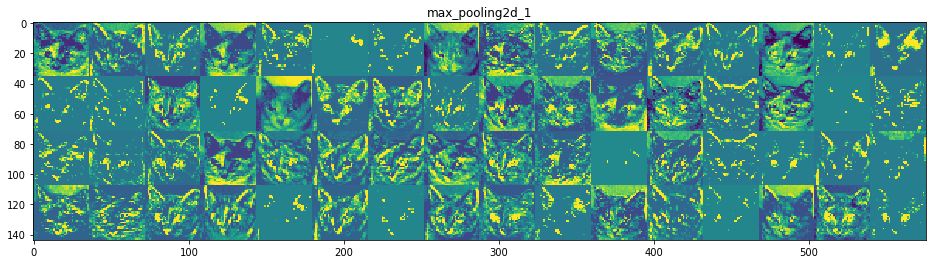

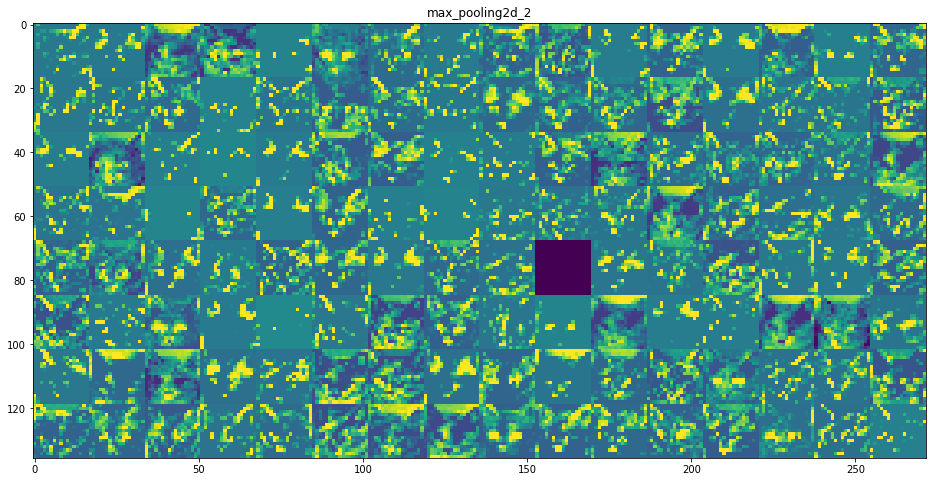

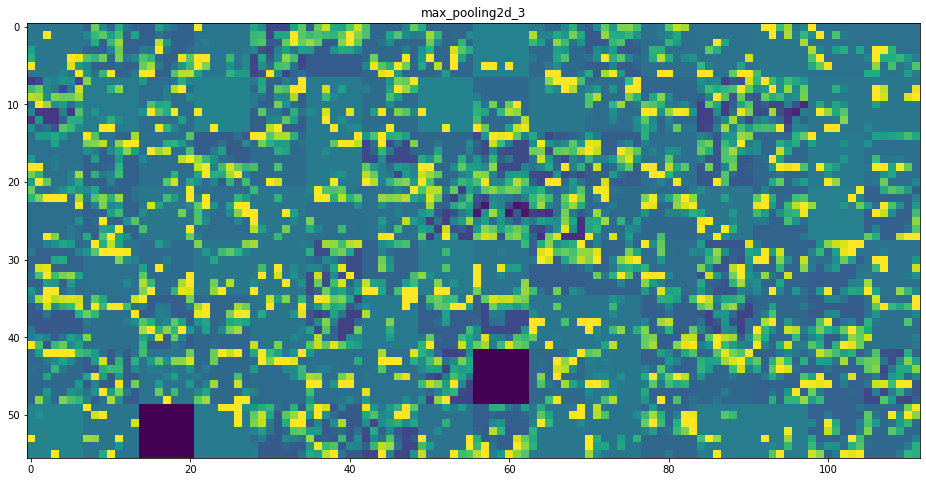

In [13]:
# 층의 이름을 그래프 제목으로 사용합니다
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그립니다
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기는 (1, size, size, n_features)입니다
    size = layer_activation.shape[1]

    # 활성화 채널을 위한 그리드 크기를 구합니다
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

import tensorflow as tf
import numpy as np

conv_layer = model.get_layer(layer_name)
heatmap_model = models.Model([model.inputs], [conv_layer.output])

def iterate(input_img_data):
    with tf.GradientTape() as gtape:
        conv_output = heatmap_model(input_img_data)
        loss = K.mean(conv_output[:, :, :, filter_index])
    grads = gtape.gradient(loss, input_img_data)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    return loss, grads

# 잡음이 섞인 회색 이미지로 시작합니다
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))

step = 1.
for i in range(40):   # 경사 상승법을 40회 실행합니다
    # 손실과 그래디언트를 계산합니다
    loss_value, grads_value = iterate([input_img_data])
    # 손실을 최대화하는 방향으로 입력 이미지를 수정합니다
    input_img_data.assign_add(grads_value * step)

58892288/58889256 [==============================] - 6s 0us/step


In [0]:
def deprocess_image(x):
    # 텐서의 평균이 0, 표준 편차가 0.1이 되도록 정규화합니다
    x -= np.mean(x)
    x /= (np.std(x) + 1e-5)
    x *= 0.1

    # [0, 1]로 클리핑합니다
    x += 0.5
    x = np.clip(x, 0, 1)

    # RGB 배열로 변환합니다
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
    conv_layer = model.get_layer(layer_name)
    heatmap_model = models.Model([model.inputs], [conv_layer.output])

    def iterate(input_img_data):
        with tf.GradientTape() as gtape:
            conv_output = heatmap_model(input_img_data)
            loss = K.mean(conv_output[:, :, :, filter_index])
        grads = gtape.gradient(loss, input_img_data)[0]
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        return loss, grads

    # 잡음이 섞인 회색 이미지로 시작합니다
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))

    # 경사 상승법을 40 단계 실행합니다
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data.assign_add(grads_value * step)        

    img = input_img_data[0]
    return deprocess_image(img)

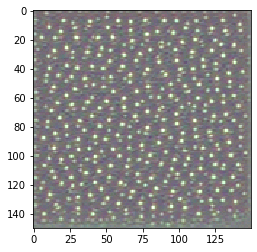

In [17]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

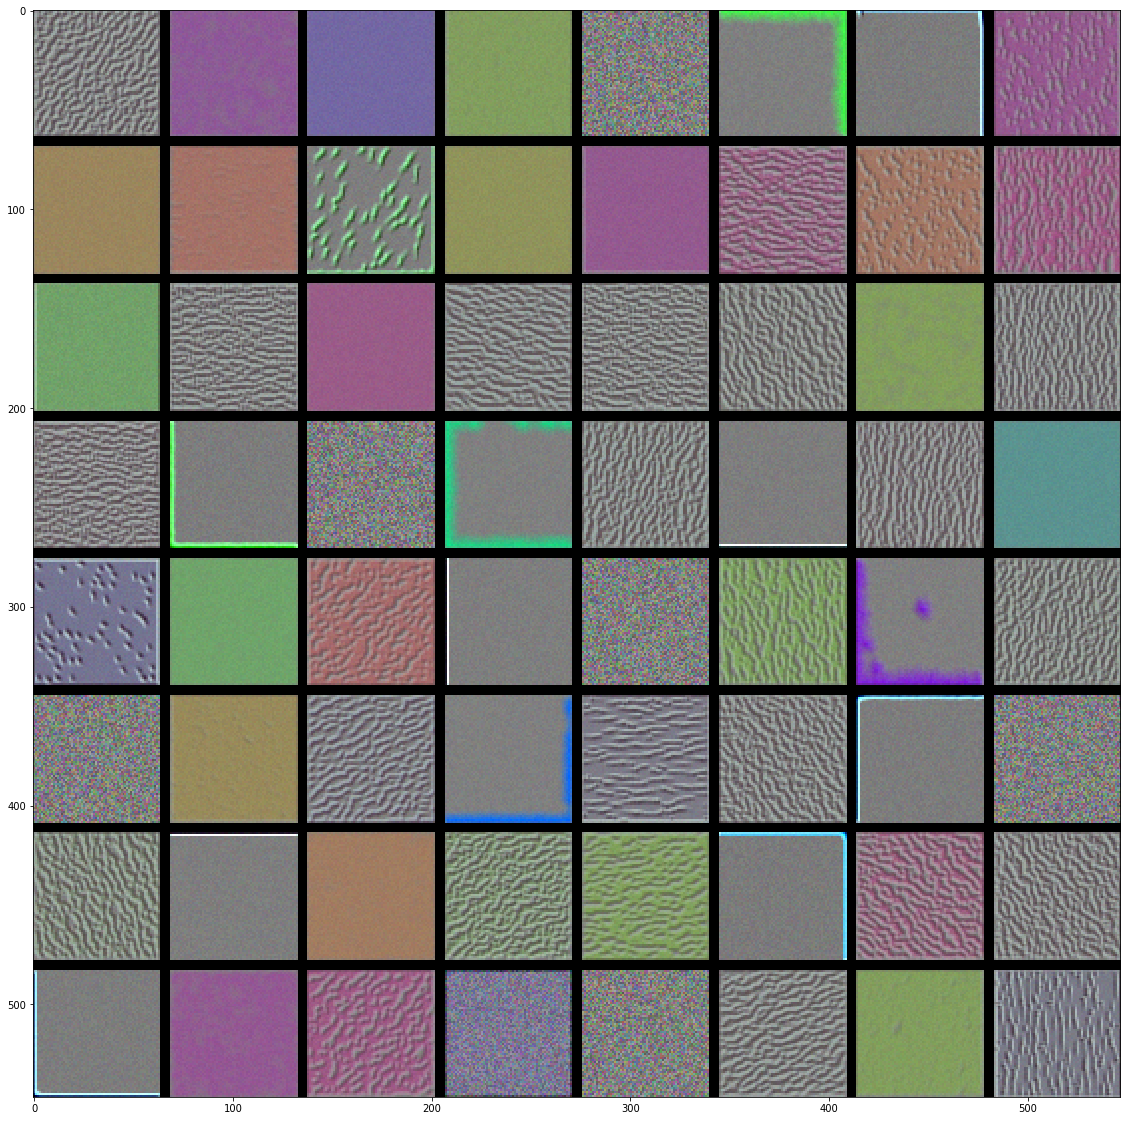

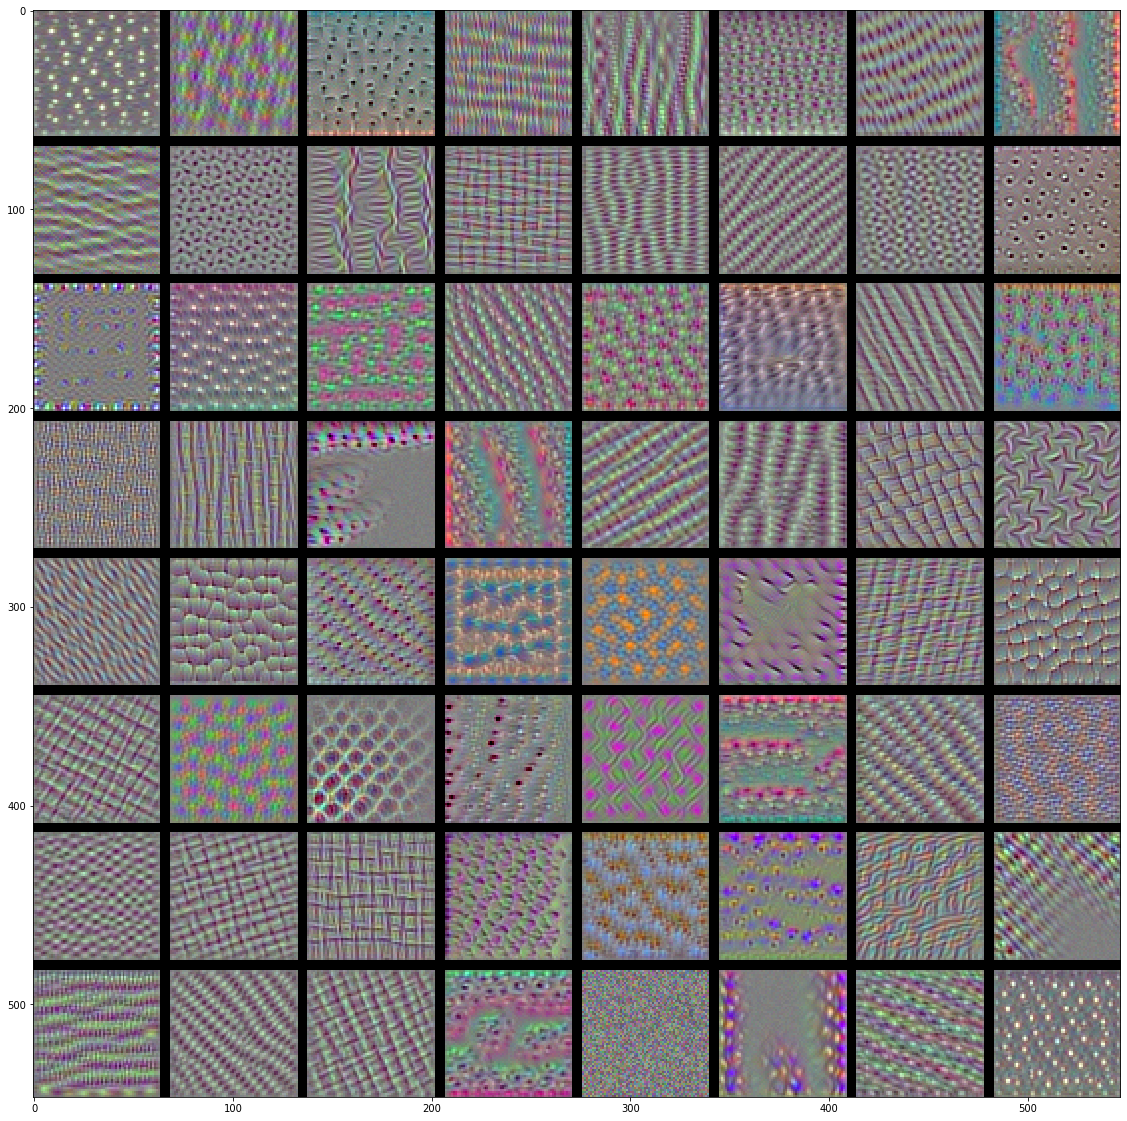

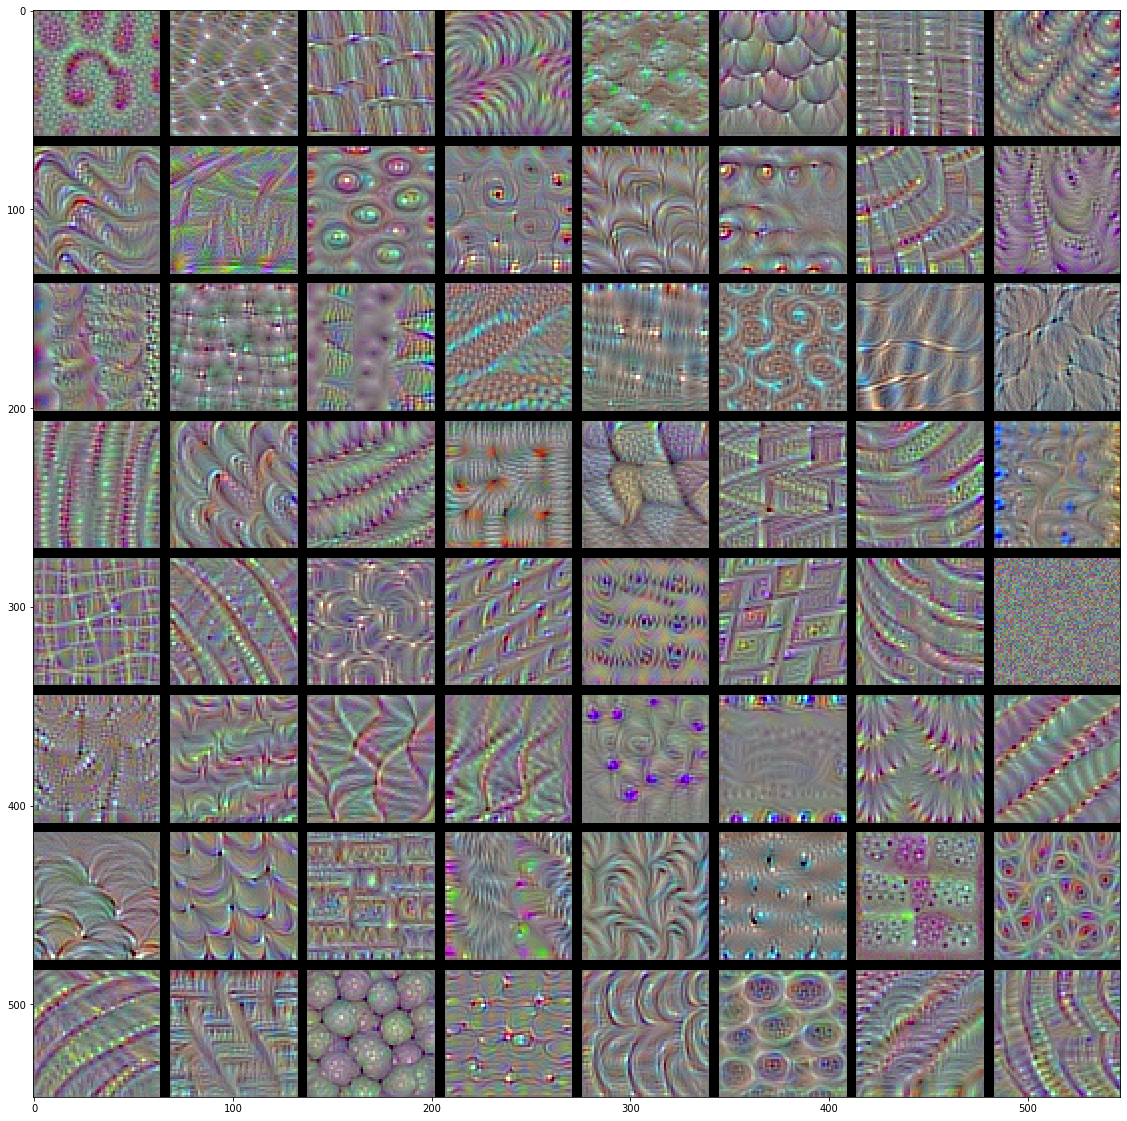

In [18]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # 결과를 담을 빈 (검은) 이미지
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

    for i in range(8):  # results 그리드의 행을 반복합니다
        for j in range(8):  # results 그리드의 열을 반복합니다
            # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴 생성합니다
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # results 그리드의 (i, j) 번째 위치에 저장합니다
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # results 그리드를 그립니다
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16

K.clear_session()

# 이전 모든 예제에서는 최상단의 완전 연결 분류기를 제외했지만 여기서는 포함합니다
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 41s 0us/step


In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# 이미지 경로
img_path = 'deep-learning-with-python-notebooks/datasets/creative_commons_elephant.jpg'

# 224 × 224 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
img = image.load_img(img_path, target_size=(224, 224))

# (224, 224, 3) 크기의 넘파이 float32 배열
x = image.img_to_array(img)

# 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 변환합니다
x = np.expand_dims(x, axis=0)

# 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
x = preprocess_input(x)

In [21]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.9094213), ('n01871265', 'tusker', 0.08618258), ('n02504013', 'Indian_elephant', 0.004354576)]


In [22]:
np.argmax(preds[0])

386

In [23]:
african_elephant_output = model.output[:, 386]

# VGG16의 마지막 합성곱 층인 block5_conv3 층의 특성 맵
last_conv_layer = model.get_layer('block5_conv3')
heatmap_model = models.Model([model.inputs], [last_conv_layer.output, model.output])

def iterate(input_img_data):
    with tf.GradientTape() as gtape:
        conv_output, model_output = heatmap_model(input_img_data)
        loss = model_output[:, 386]

    grads = gtape.gradient(loss, conv_output)[0]
    print(grads.shape)
    pooled_grads = K.mean(grads, axis=(0, 1))
    print(pooled_grads.shape)

    return pooled_grads, conv_output

# 두 마리 코끼리가 있는 샘플 이미지를 주입하고 두 개의 넘파이 배열을 얻습니다
pooled_grads_value, conv_layer_output_value = iterate(x)
print(pooled_grads_value.shape)
print(conv_layer_output_value.shape)

# "아프리카 코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다
heatmap = np.ones(conv_layer_output_value.shape[1:3], dtype=np.float32)
print(heatmap.shape)
for i in range(512):
    heatmap += pooled_grads_value[i] * conv_layer_output_value[:, :, :, i]
heatmap = heatmap[0]
print(heatmap.shape)

(14, 14, 512)
(512,)
(512,)
(1, 14, 14, 512)
(14, 14)
(14, 14)


In [24]:
heatmap = np.maximum(heatmap, 0)
print(heatmap)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
#heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

[[1.0003077  1.0001726  1.0003597  1.0003675  1.0002899  1.0000037
  1.0000005  1.0002148  1.000441   1.0003855  1.0002637  1.0002892
  1.0003302  1.0006593 ]
 [1.0001804  1.0000111  1.0000908  1.000026   0.99992675 1.0001903
  0.9999738  0.9999307  0.9999251  1.0002582  1.0003417  1.0002607
  1.0002257  1.0002522 ]
 [1.0004615  1.0002251  1.0001817  1.0001239  1.000178   0.9998237
  1.0000949  1.0011694  1.0006018  1.0010014  1.000664   1.0007387
  1.000566   1.0006641 ]
 [1.000603   1.0002799  1.0001024  1.0000261  1.000187   1.0001143
  1.00066    1.0015571  1.0010773  1.0004265  1.000046   1.0004908
  1.00082    1.0010232 ]
 [1.000577   1.0002843  1.0001773  1.0003403  1.0012435  1.0016992
  1.0019231  1.0031091  1.0034891  1.0026429  1.0020899  1.0020627
  1.0012411  1.0013834 ]
 [1.000154   1.0003163  1.0007485  1.0024325  1.0034238  1.0037167
  1.0030395  1.0030761  1.0031756  1.0029736  1.0025729  1.0015285
  1.000906   1.0009422 ]
 [0.99992573 1.0000274  1.0008994  1.0052549  

In [0]:
import cv2

# cv2 모듈을 사용해 원본 이미지를 로드합니다
img = cv2.imread(img_path)
heatmap = np.array(heatmap)

# heatmap을 원본 이미지 크기에 맞게 변경합니다
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# heatmap을 RGB 포맷으로 변환합니다
heatmap = np.uint8(255 * heatmap)

# 히트맵으로 변환합니다
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4는 히트맵의 강도입니다
superimposed_img = heatmap * 0.4 + img

# 디스크에 이미지를 저장합니다
cv2.imwrite('./datasets/elephant_cam.jpg', superimposed_img)

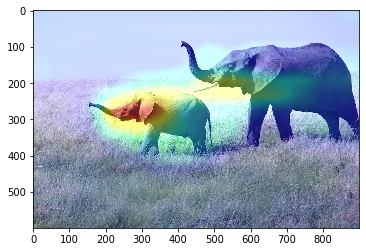

In [34]:
plt.imshow(plt.imread('./datasets/elephant_cam.jpg'))
plt.show()